# Digit Recognizer

## Import Libraries

In [99]:
#import libraries 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Dropout,Lambda,Flatten
from keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split

## Read Data

In [100]:
train_data=pd.read_csv("train.csv")
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
train_data.shape

(42000, 785)

In [102]:
test_data=pd.read_csv("test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
test_data.shape

(28000, 784)

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [105]:
X_train=(train_data.iloc[:,1:].values).astype("float32") # all pixel values of train data
y_train=train_data.iloc[:,0].values.astype('int32') # label of train data
X_test=test_data.values.astype('float32')  #all pixel values in test data

In [106]:
X_train,X_test,y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([1, 0, 1, ..., 7, 6, 9]))

## Visualize data

Text(0.5, 1.0, 'Label of X_train[24] is 2')

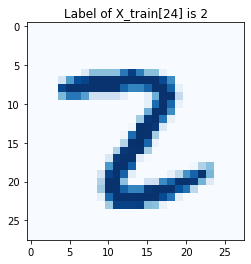

In [107]:
X_train=X_train.reshape(X_train.shape[0],28,28)    # convert train data set in [num train images,28,28] format
plt.imshow(X_train[24],plt.get_cmap('Blues'))
plt.title( "Label of X_train[24] is "+str(y_train[24]))

## Preprocessing

In [108]:
# standardization
mean_pixel=X_train.mean().astype(np.float32)
std_pixel=X_train.std().astype(np.float32)
def standardization(X):
    return (x-mean_pixel)/std_pixel
print(y_train.shape)
y_train

(42000,)


array([1, 0, 1, ..., 7, 6, 9])

In [109]:
#one hot encoding of labels
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
print(y_train.shape)
y_train

(42000, 10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [110]:
num_classes=y_train.shape[1]
num_classes

10

C:\Users\sivaluxan\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

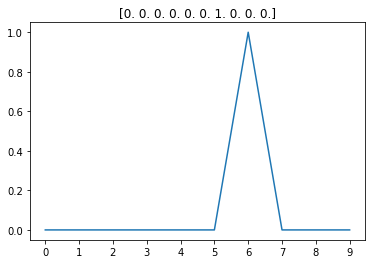

In [113]:
#plot an label
plt.plot(y_train[45])
plt.xticks(range(num_classes))
plt.title(y_train[45])